In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score


In [104]:
df = pd.read_csv('Supermart Grocery Sales - Retail Analytics Dataset.csv')
df.head(10)

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu
5,OD6,Adavan,Food Grains,Organic Staples,Dharmapuri,06-09-2015,West,2305,0.26,322.70,Tamil Nadu
6,OD7,Jonas,Fruits & Veggies,Fresh Vegetables,Trichy,06-09-2015,West,826,0.33,346.92,Tamil Nadu
7,OD8,Hafiz,Fruits & Veggies,Fresh Fruits,Ramanadhapuram,06-09-2015,West,1847,0.32,147.76,Tamil Nadu
8,OD9,Hafiz,Bakery,Biscuits,Tirunelveli,06-09-2015,West,791,0.23,181.93,Tamil Nadu
9,OD10,Krithika,Bakery,Cakes,Chennai,06-09-2015,West,1795,0.27,484.65,Tamil Nadu


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB


In [106]:
# Check for any missing or null values
print(df.isnull().sum())

Order ID         0
Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Region           0
Sales            0
Discount         0
Profit           0
State            0
dtype: int64


In [107]:
# Remove unnecessary columns
df = df.drop(columns=['Order ID', 'State'])
#removing orderId and State as they are not required

# Rename columns
df = df.rename(columns={'Sub Category': 'Sub_Category', 'Order Date': 'Order_Date'})

In [108]:
# Convert date column to datetime format
df['Order_Date'] = pd.to_datetime(df['Order_Date'], errors='coerce')
print(df.info())

# Check for any remaining null values in the date column
print(df[df['Order_Date'].isnull()])

"""If any null values are found, check the original data to identify the correct date 
format and update the format parameter in the to_datetime function accordingly."""

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Customer Name  9994 non-null   object        
 1   Category       9994 non-null   object        
 2   Sub_Category   9994 non-null   object        
 3   City           9994 non-null   object        
 4   Order_Date     9994 non-null   datetime64[ns]
 5   Region         9994 non-null   object        
 6   Sales          9994 non-null   int64         
 7   Discount       9994 non-null   float64       
 8   Profit         9994 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 702.8+ KB
None
Empty DataFrame
Columns: [Customer Name, Category, Sub_Category, City, Order_Date, Region, Sales, Discount, Profit]
Index: []


'If any null values are found, check the original data to identify the correct date \nformat and update the format parameter in the to_datetime function accordingly.'

In [109]:
df1 = df[['Order_Date','Sales']]
df1.head(30)
df1.info()
df1['Order_Date'] = pd.to_datetime(df1['Order_Date'], errors='coerce')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Order_Date  9994 non-null   datetime64[ns]
 1   Sales       9994 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 156.3 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Order_Date  9994 non-null   datetime64[ns]
 1   Sales       9994 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 156.3 KB


C:\Users\bapal\AppData\Local\Temp\ipykernel_165804\969778650.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [110]:
df1['Order_Date']=df1['Order_Date'].dt.to_period("M")
monthly_sales=df1.groupby('Order_Date').sum().reset_index()
monthly_sales['Order_Date']=monthly_sales['Order_Date'].dt.to_timestamp()
monthly_sales.head(20)


C:\Users\bapal\AppData\Local\Temp\ipykernel_165804\2792399151.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Order_Date,Sales
0,2015-01-01,122497
1,2015-02-01,66030
2,2015-03-01,247156
3,2015-04-01,203258
4,2015-05-01,164263
5,2015-06-01,206064
6,2015-07-01,220986
7,2015-08-01,230161
8,2015-09-01,382200
9,2015-10-01,241726


# Visualisation before modelling

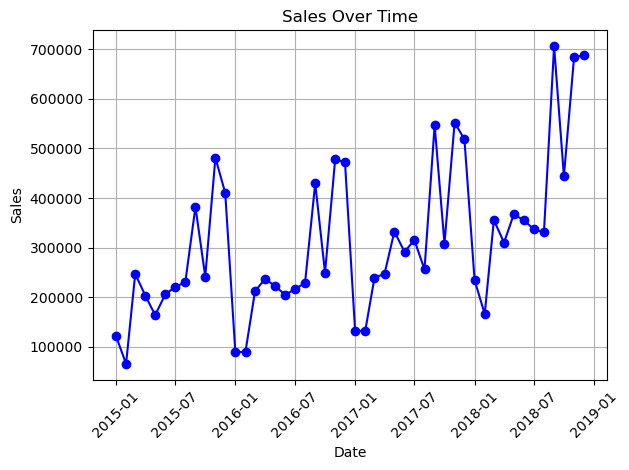

In [111]:
plt.plot(monthly_sales['Order_Date'], monthly_sales['Sales'], color='blue', marker='o', linestyle='-')

# Customize the plot
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Display the plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [112]:
import plotly.express as px
fig = px.line(monthly_sales, x='Order_Date', y='Sales', title='Sales Over Time')

# Customize the plot
fig.update_layout(xaxis_title='Date', yaxis_title='Sales', xaxis_tickangle=-45)

# Show the plot
fig.show()

### Call the difference on the sales column to make the sales data stationary

In [113]:
monthly_sales['Sales_Difference'] = monthly_sales['Sales'].diff()

# Drop the first row since it will have NaN value after differencing
monthly_sales = monthly_sales.dropna()

# Display the resulting DataFrame
print(monthly_sales.head(10))

   Order_Date   Sales  Sales_Difference
1  2015-02-01   66030          -56467.0
2  2015-03-01  247156          181126.0
3  2015-04-01  203258          -43898.0
4  2015-05-01  164263          -38995.0
5  2015-06-01  206064           41801.0
6  2015-07-01  220986           14922.0
7  2015-08-01  230161            9175.0
8  2015-09-01  382200          152039.0
9  2015-10-01  241726         -140474.0
10 2015-11-01  480979          239253.0


In [114]:
import plotly.express as px
fig = px.line(monthly_sales, x='Order_Date', y='Sales', title='Sales Over Time')

# Customize the plot
fig.update_layout(xaxis_title='Date', yaxis_title='Sales', xaxis_tickangle=-45)

# Show the plot
fig.show()

 # MODEL TRAINING
 

In [115]:
sup_data = monthly_sales.drop(['Order_Date','Sales'],axis=1)

In [116]:
#preparing the supervised data
for i in range (1,13):
    col='month_'+str(i)
    sup_data[col]=sup_data['Sales_Difference'].shift(i)
sup_data=sup_data.dropna().reset_index(drop=True)
sup_data.head(10)

,Sales_Difference,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,1814.0,-321270.0,-70700.0,239253.0,-140474.0,152039.0,9175.0,14922.0,41801.0,-38995.0,-43898.0,181126.0,-56467.0
1,121341.0,1814.0,-321270.0,-70700.0,239253.0,-140474.0,152039.0,9175.0,14922.0,41801.0,-38995.0,-43898.0,181126.0
2,25108.0,121341.0,1814.0,-321270.0,-70700.0,239253.0,-140474.0,152039.0,9175.0,14922.0,41801.0,-38995.0,-43898.0
3,-14550.0,25108.0,121341.0,1814.0,-321270.0,-70700.0,239253.0,-140474.0,152039.0,9175.0,14922.0,41801.0,-38995.0
4,-17334.0,-14550.0,25108.0,121341.0,1814.0,-321270.0,-70700.0,239253.0,-140474.0,152039.0,9175.0,14922.0,41801.0
5,10388.0,-17334.0,-14550.0,25108.0,121341.0,1814.0,-321270.0,-70700.0,239253.0,-140474.0,152039.0,9175.0,14922.0
6,13767.0,10388.0,-17334.0,-14550.0,25108.0,121341.0,1814.0,-321270.0,-70700.0,239253.0,-140474.0,152039.0,9175.0
7,200115.0,13767.0,10388.0,-17334.0,-14550.0,25108.0,121341.0,1814.0,-321270.0,-70700.0,239253.0,-140474.0,152039.0
8,-180019.0,200115.0,13767.0,10388.0,-17334.0,-14550.0,25108.0,121341.0,1814.0,-321270.0,-70700.0,239253.0,-140474.0
9,228081.0,-180019.0,200115.0,13767.0,10388.0,-17334.0,-14550.0,25108.0,121341.0,1814.0,-321270.0,-70700.0,239253.0


 ## Splitting the Data

In [117]:
train_data=sup_data[:-12]
test_data=sup_data[-12:]
print(train_data.shape)
print(test_data.shape)



(23, 13)
(12, 13)


## We are using MinMax Scaler to normalize the values

In [118]:
scaler = MinMaxScaler(feature_range=(-1,1))
scaler.fit(train_data)
train_data=scaler.transform(train_data)
test_data=scaler.transform(test_data)

In [133]:
x_train, y_train = train_data[:,1:],train_data[:,0:1]
x_test, y_test = test_data[:,1:],test_data[:,0:1]
y_train=y_train.ravel()
y_test=y_test.ravel()
print("X-Train Shape:",x_train.shape)
print("y-Train Shape:",y_train.shape)
print("x-test Shape:",x_test.shape)
print("y-test Shape:",y_test.shape)

X-Train Shape: (23, 12)
y-Train Shape: (23,)
x-test Shape: (12, 12)
y-test Shape: (12,)


 ### Making a prediction dataframe

In [141]:
sales_date = monthly_sales['Order_Date'][-12:].reset_index(drop=True)
predict_df = pd.DataFrame(sales_date)

In [142]:
act_sales = monthly_sales ['Sales'][-13:].to_list() 
#getting the values of last 13 months because it will be used for comparison
print(act_sales)

[518307, 234739, 166267, 355704, 310150, 367411, 354902, 337092, 331014, 705680, 443898, 683410, 687245]


## LINEAR REGRESSION MODEL

### To create the linear regression model and also making the linear regression preiction and draw comparison 

In [143]:
lr_model= LinearRegression()
lr_model.fit(x_train,y_train)
lr_prediction = lr_model.predict(x_test)


In [144]:
lr_prediction = lr_prediction.reshape(-1,1)
lr_pre_test_set = np.concatenate([lr_prediction,x_test],axis=1)
lr_pre_test_set = scaler.inverse_transform(lr_pre_test_set)


 ### We have created Model, created a test set and merged both prediction and test set to inverse transform to original values. We created a Set Matrix containing X-Test with Predicted Output instead of real output.

In [145]:
print(lr_pre_test_set)

[[-338674.18315315  -33508.          243789.         -238702.
   290639.          -59442.           24077.          -41070.
    84751.            8817.          105974.            1255.
  -340518.        ]
 [ -12515.56348544 -283568.          -33508.          243789.
  -238702.          290639.          -59442.           24077.
   -41070.           84751.            8817.          105974.
     1255.        ]
 [  92899.79264395  -68472.         -283568.          -33508.
   243789.         -238702.          290639.          -59442.
    24077.          -41070.           84751.            8817.
   105974.        ]
 [ -63970.34150402  189437.          -68472.         -283568.
   -33508.          243789.         -238702.          290639.
   -59442.           24077.          -41070.           84751.
     8817.        ]
 [ 145630.30132013  -45554.          189437.          -68472.
  -283568.          -33508.          243789.         -238702.
   290639.          -59442.           24077.        

In [146]:
result = []
for index in range(0,len(lr_pre_test_set)):
    result.append(lr_pre_test_set[index][0]+ act_sales[index])
lr_prediction_series = pd. Series(result, name='Linear Prediction')
predict_df = predict_df.merge(lr_prediction_series,left_index=True,right_index=True)

In [147]:
print(predict_df)

   Order_Date  Linear Prediction
0  2018-01-01      179632.816847
1  2018-02-01      222223.436515
2  2018-03-01      259166.792644
3  2018-04-01      291733.658496
4  2018-05-01      455780.301320
5  2018-06-01      297273.866942
6  2018-07-01      387048.405916
7  2018-08-01      238708.454167
8  2018-09-01      668723.677737
9  2018-10-01      366399.543146
10 2018-11-01      660251.511686
11 2018-12-01      594862.863305


In [148]:
lr_mse= np.sqrt(mean_squared_error(predict_df['Linear Prediction'],monthly_sales['Sales'][-12:]))
lr_mae= mean_absolute_error(predict_df['Linear Prediction'],monthly_sales['Sales'][-12:])
lr_r2= r2_score(predict_df['Linear Prediction'],monthly_sales['Sales'][-12:])

print(" Linear Regression MSE: ",lr_mse)
print(" Linear Regression MAE: ",lr_mae)
print(" Linear Regression R2: ",lr_r2)

 Linear Regression MSE:  67339.34894633491
 Linear Regression MAE:  62022.5798985284
 Linear Regression R2:  0.8340833853830065


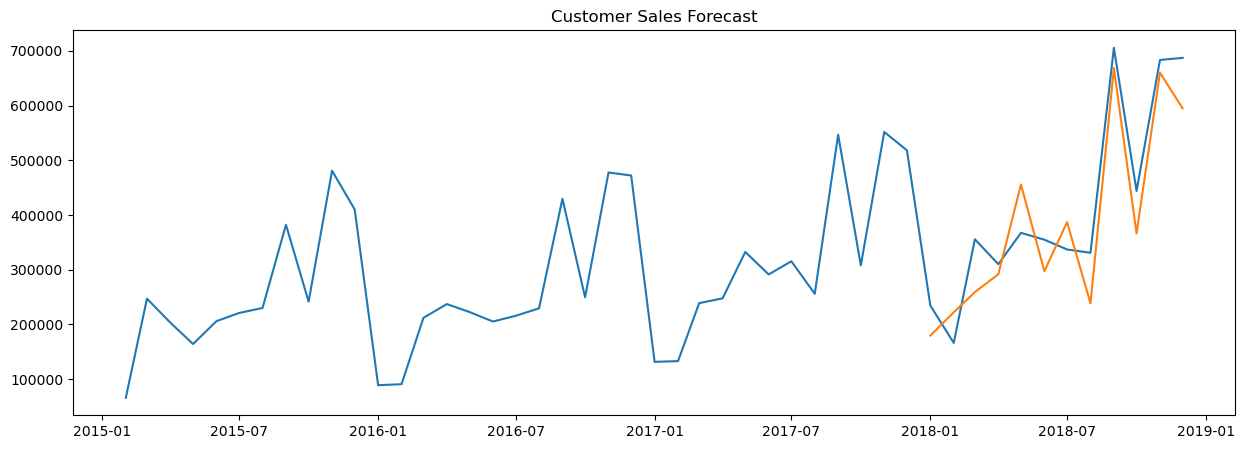

In [150]:
plt.figure(figsize=(15,5))
plt.plot(monthly_sales['Order_Date'],monthly_sales['Sales'])
plt.plot(predict_df['Order_Date'],predict_df['Linear Prediction'])
plt.title("Customer Sales Forecast")
plt.show()

In [152]:
import plotly.express as px

# Create a figure using Plotly Express
fig = px.line()

# Add the sales data to the figure
fig.add_scatter(x=monthly_sales['Order_Date'], y=monthly_sales['Sales'], mode='lines', name='Actual Sales', line_color='blue')

# Add the linear prediction data to the figure
fig.add_scatter(x=predict_df['Order_Date'], y=predict_df['Linear Prediction'], mode='lines', name='Linear Prediction', line_color='red')

# Customize the layout of the plot
fig.update_layout(title="Customer Sales Forecast",
                  xaxis_title="Order Date",
                  yaxis_title="Sales",
                  legend_title="Data",
                  xaxis=dict(tickangle=-45),
                  showlegend=True)

# Show the plot
fig.show()


In [157]:
"""from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming act_sales contains the true labels and predict_df contains the predicted probabilities for each class

# Compute ROC curve and ROC area for each class
n_classes = len(predict_df.columns)  # Number of classes
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(act_sales == i, predict_df.iloc[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve (class {}) (area = {:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for each class')
plt.legend(loc="lower right")
plt.show()"""


'from sklearn.metrics import roc_curve, auc\nimport matplotlib.pyplot as plt\n\n# Assuming act_sales contains the true labels and predict_df contains the predicted probabilities for each class\n\n# Compute ROC curve and ROC area for each class\nn_classes = len(predict_df.columns)  # Number of classes\nfpr = dict()\ntpr = dict()\nroc_auc = dict()\nfor i in range(n_classes):\n    fpr[i], tpr[i], _ = roc_curve(act_sales == i, predict_df.iloc[:, i])\n    roc_auc[i] = auc(fpr[i], tpr[i])\n\n# Plot ROC curve for each class\nplt.figure(figsize=(8, 6))\nfor i in range(n_classes):\n    plt.plot(fpr[i], tpr[i], lw=2, label=\'ROC curve (class {}) (area = {:0.2f})\'.format(i, roc_auc[i]))\n\nplt.plot([0, 1], [0, 1], color=\'navy\', lw=2, linestyle=\'--\')\nplt.xlim([0.0, 1.0])\nplt.ylim([0.0, 1.05])\nplt.xlabel(\'False Positive Rate\')\nplt.ylabel(\'True Positive Rate\')\nplt.title(\'Receiver Operating Characteristic (ROC) Curve for each class\')\nplt.legend(loc="lower right")\nplt.show()'